In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [4]:
cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    8362868,
    8663041,
    9041835,
    9430261,
    9831897,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='2/6/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

In [5]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [29]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 40)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (math.log(x) * 650 * i) for i, x in enumerate(projection, start=1)]
print(projection)

[409785.7745033268, 410269.3196072537, 410726.26595034625, 411157.4190193989, 411563.54172100767, 411945.3574875785, 412303.5530987601, 412638.78124939697, 412951.6628911846, 413242.78937183565, 413512.7243926788, 413762.00580311014, 413991.1472481575, 414200.63968354376, 414390.95277100673, 414562.5361652055, 414715.8207023116, 414851.2194992828, 414969.1289718714, 415069.92977857345, 415153.987696985, 415221.6544383771, 415273.2684057205, 415309.1553998785, 415329.6292782261, 415334.9925695531, 415325.537048736, 415301.5442743534, 415263.2860921133, 415211.0251067184, 415145.01512454613, 415065.5015693237, 414972.7218727801, 414866.9058420953, 414748.2760058036, 414617.04793968244, 414473.4305740162, 414317.6264835281, 414149.83216115454, 413970.23827675206]


In [30]:

prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [31]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-02-07  409785.774503  1.024168e+07
2021-02-08  410269.319607  1.065195e+07
2021-02-09  410726.265950  1.106268e+07
2021-02-10  411157.419019  1.147384e+07
2021-02-11  411563.541721  1.188540e+07
2021-02-12  411945.357488  1.229734e+07
2021-02-13  412303.553099  1.270965e+07
2021-02-14  412638.781249  1.312229e+07
2021-02-15  412951.662891  1.353524e+07
2021-02-16  413242.789372  1.394848e+07
2021-02-17  413512.724393  1.436199e+07
2021-02-18  413762.005803  1.477576e+07
2021-02-19  413991.147248  1.518975e+07
2021-02-20  414200.639684  1.560395e+07
2021-02-21  414390.952771  1.601834e+07
2021-02-22  414562.536165  1.643290e+07
2021-02-23  414715.820702  1.684762e+07
2021-02-24  414851.219499  1.726247e+07
2021-02-25  414969.128972  1.767744e+07
2021-02-26  415069.929779  1.809251e+07
2021-02-27  415153.987697  1.850766e+07
2021-02-28  415221.654438  1.892288e+07
2021-03-01  415273.268406  1.933816e+07


In [32]:
complete = pd.concat([dataframe, result_df])
print(complete)


                    daily    cumulative
date                                   
2021-01-12  100000.000000  1.959151e+06
2021-01-13  121129.000000  2.080280e+06
2021-01-14  174276.000000  2.254556e+06
2021-01-15  239815.000000  2.494371e+06
2021-01-16  274793.000000  2.769164e+06
...                   ...           ...
2021-03-14  414617.047940  2.473465e+07
2021-03-15  414473.430574  2.514912e+07
2021-03-16  414317.626484  2.556344e+07
2021-03-17  414149.832161  2.597759e+07
2021-03-18  413970.238277  2.639156e+07

[66 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

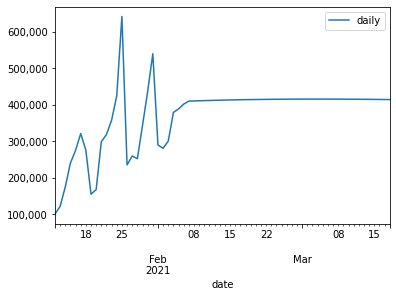

<Figure size 432x288 with 0 Axes>

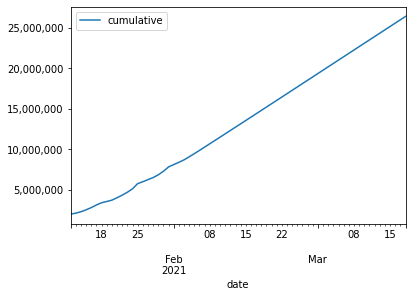

In [33]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

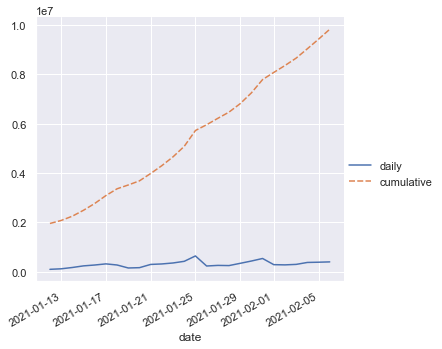

In [34]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
